<a href="https://colab.research.google.com/github/YASHAMWAN/numberplate_reader_arabic/blob/main/numberplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,891 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_plate.jpeg to car_plate (1).jpeg


In [ ]:
# Assuming the user uploaded an image file, e.g., 'car_plate.jpg'
image_path = list(uploaded.keys())[0]  # get the uploaded image file name
print(f"Image uploaded as {image_path}")

Image uploaded as car_plate (1).jpeg


In [ ]:
import cv2
import pytesseract

# Load the image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optional: Apply some preprocessing (e.g., thresholding) to improve OCR accuracy
_, processed_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

# Use pytesseract to extract text from the image
text = pytesseract.image_to_string(processed_image)

# Filter the extracted text to get the number plate format
# For example, we assume the plate number follows a certain pattern like "ABC-1234"
import re
plate_number = re.findall(r'[A-Z0-9]+', text)

# Join the parts of the plate number (if it's split) and print the result
plate_number = " ".join(plate_number)
print(f"Extracted Car Plate Number: {plate_number}")


Extracted Car Plate Number: 


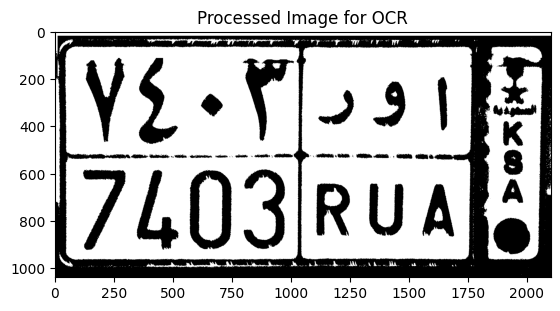

In [ ]:
import matplotlib.pyplot as plt

# Show the processed image
plt.imshow(processed_image, cmap='gray')
plt.title('Processed Image for OCR')
plt.show()


In [ ]:
!pip install easyocr



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 24.6 MB/s eta 0:00:00


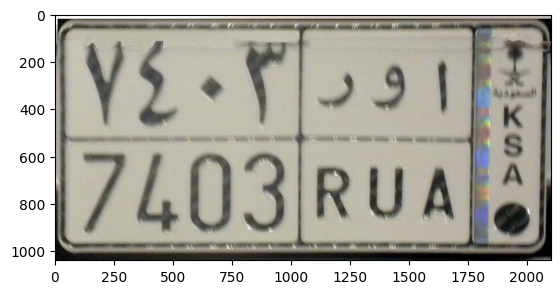

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteExtracted Plate Number: 9 K 7403/RUA VI
Plate number saved to 'extracted_plate_number_easyocr.txt'


In [ ]:
import easyocr
import matplotlib.pyplot as plt
import cv2

# Load the image using OpenCV
image_path = 'car_plate.jpeg'
image = cv2.imread(image_path)

# Display the image (optional, to verify the image is loaded correctly)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Initialize the EasyOCR Reader for English only
reader = easyocr.Reader(['en'])

# Perform OCR on the image
result = reader.readtext(image_path)

# Extract and print the detected text
plate_number = ""
for detection in result:
    text = detection[1]
    plate_number += text + " "

print(f"Extracted Plate Number: {plate_number.strip()}")

# Save the extracted text to a file
with open("extracted_plate_number_easyocr.txt", "w") as file:
    file.write(f"English Plate Number: {plate_number.strip()}")

print("Plate number saved to 'extracted_plate_number_easyocr.txt'")


In [ ]:
processed_plate = re.findall(r'\d+/[A-Z]{3}', plate_number)

if processed_plate:
    cleaned_plate = processed_plate[0]  # Take the first valid match
else:
    cleaned_plate = "Plate number not found."

print(f"Extracted Plate Number (Cleaned): {cleaned_plate}")

# Save the cleaned plate number to a file
with open("extracted_plate_number_easyocr_cleaned.txt", "w") as file:
    file.write(f"English Plate Number: {cleaned_plate}")

Extracted Plate Number (Cleaned): 7403/RUA
